<a href="https://colab.research.google.com/github/M-M-Mujtaba/Kmeans_Compression/blob/master/AI_ASS_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)


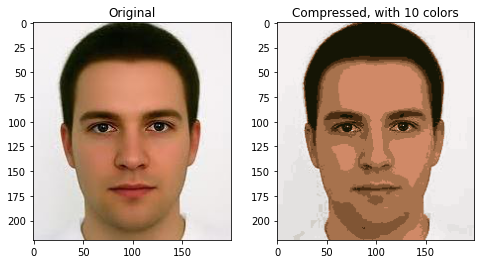

In [20]:

import os
import numpy as np

from matplotlib import pyplot
from matplotlib.animation import FuncAnimation
import matplotlib as mpl


from scipy import optimize


import math


def closestKs(data, k):
  

    k_size = k.shape[0]
    index = np.zeros(data.shape[0], dtype=int)

    import pdb
    # pdb.set_trace()
    print(k.shape)
    for i in range(data.shape[0]):
        min = 100000
        for j in range(k_size):
            dist = math.sqrt((data[i][0] - k[j][0]) ** 2 + (data[i][1] - k[j][1]) ** 2)
            if dist < min:
                index[i] = j
                min = dist

    return index


def findK(data, index, K):
    # big K is the size required and the small k holds the values of ks

    m, n = data.shape
    k = np.zeros((K, n)) # the means
    counter = np.zeros((K, 1)) # for averaging 

    for i in range(m):
        k[index[i]] += data[i]
        counter[index[i]] += 1

    k = k / counter

    return k

# initialize k with some random values from the sample 
def initK(data, K):

    m, n = data.shape
    k = np.zeros((K, n))
    randidx = np.random.permutation(data.shape[0])
    k = data[randidx[:K], :]

    return k

# run the actual kMeans where we repeatedly find closest ks to data set and update value of k on each iteration 
def kMeans(data, k, max_iters=10):
 
    K = k.shape[0]
    index = None

    for i in range(max_iters):
        index = closestKs(data, k)

        k = findK(data, index, K)

    return k, index




K = 10  # maximum 10 unique colors
max_iters = 10

# Load an image of a bird

A = mpl.image.imread('/content/face.png')

temp = np.array(A, copy = True)

temp = temp / 255

# turn into 2dify matrix ( convert the three layers into 1)
data = temp.reshape(-1, 3)


k = initK(data, K)

# Run K-Means
k, index = kMeans(data, k, max_iters)


#reshape the matrix in the form of an image 
data_recovered = k[index, :].reshape(temp.shape)

# image display code from the internet 
fig, ax = pyplot.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(temp*255)
ax[0].set_title('Original')
ax[0].grid(False)


ax[1].imshow(data_recovered*255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)